In [1]:
import geopandas as gpd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
# Function to generate grid points within a bounding box
def generate_grid_points(min_x, min_y, max_x, max_y, distance):
    x_coords = np.arange(min_x, max_x + distance, distance)
    y_coords = np.arange(min_y, max_y + distance, distance)
    grid_points = [Point(x, y) for x in x_coords for y in y_coords]
    return grid_points

In [3]:
# Load the shapefile into a GeoDataFrame
dams = gpd.read_file(r"D:\CS\GitHub\Nuclear-Site-Selection\dam\Dam.shp")

# Buffer distance in meters
buffer_distance = 10000  # 10 km
grid_distance = 1000  # distance between points in the grid in meters

# Create buffers around each point
dams['buffers'] = dams.buffer(buffer_distance)



C:\Users\Nirman\AppData\Local\Temp\ipykernel_22508\272845539.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dams['buffers'] = dams.buffer(buffer_distance)


In [4]:
# Generate grid points for the bounding box of the buffers
all_grid_points = []

# Compute the combined bounding box of all buffers
minx, miny, maxx, maxy = dams['buffers'].total_bounds

In [5]:
# Generate the grid points within the combined bounding box
grid_points = generate_grid_points(minx, miny, maxx, maxy, grid_distance)

In [6]:
# Convert list of grid points to GeoDataFrame
grid_gdf = gpd.GeoDataFrame(geometry=grid_points, crs=dams.crs)

In [7]:
# Filter grid points to retain only those within any buffer
buffers_gdf = gpd.GeoDataFrame(geometry=dams['buffers'], crs=dams.crs) 

In [8]:
joined = gpd.sjoin(grid_gdf,buffers_gdf,how = 'inner', op = 'within')

c:\Users\Nirman\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [9]:
joined['dam_id'] = dams.loc[joined.index_right,'dm_name'].values

In [19]:
joined

,geometry,index_right,dam_id
28,POINT (-8931.47468 -3991.76819),0,Ajan Dam
28,POINT (-8931.47468 -3991.76819),1,Amrity Dam
28,POINT (-8931.47468 -3991.76819),2,Badua Dam
28,POINT (-8931.47468 -3991.76819),3,Ahraura Dam
28,POINT (-8931.47468 -3991.76819),4,Maudaha (Swami Brahmanand ) Dam
...,...,...,...
450,POINT (10068.52532 8.23181),5614,Ghoghri Dam
450,POINT (10068.52532 8.23181),5615,Kesli Dam
450,POINT (10068.52532 8.23181),5616,Sonpur Dam
450,POINT (10068.52532 8.23181),5617,Surajpura Dam


In [20]:
joined = joined.drop_duplicates(subset='geometry')

In [10]:
states_india = gpd.read_file(r"D:\Downloads\Administrative Boundary Database\STATE_BOUNDARY.shp")

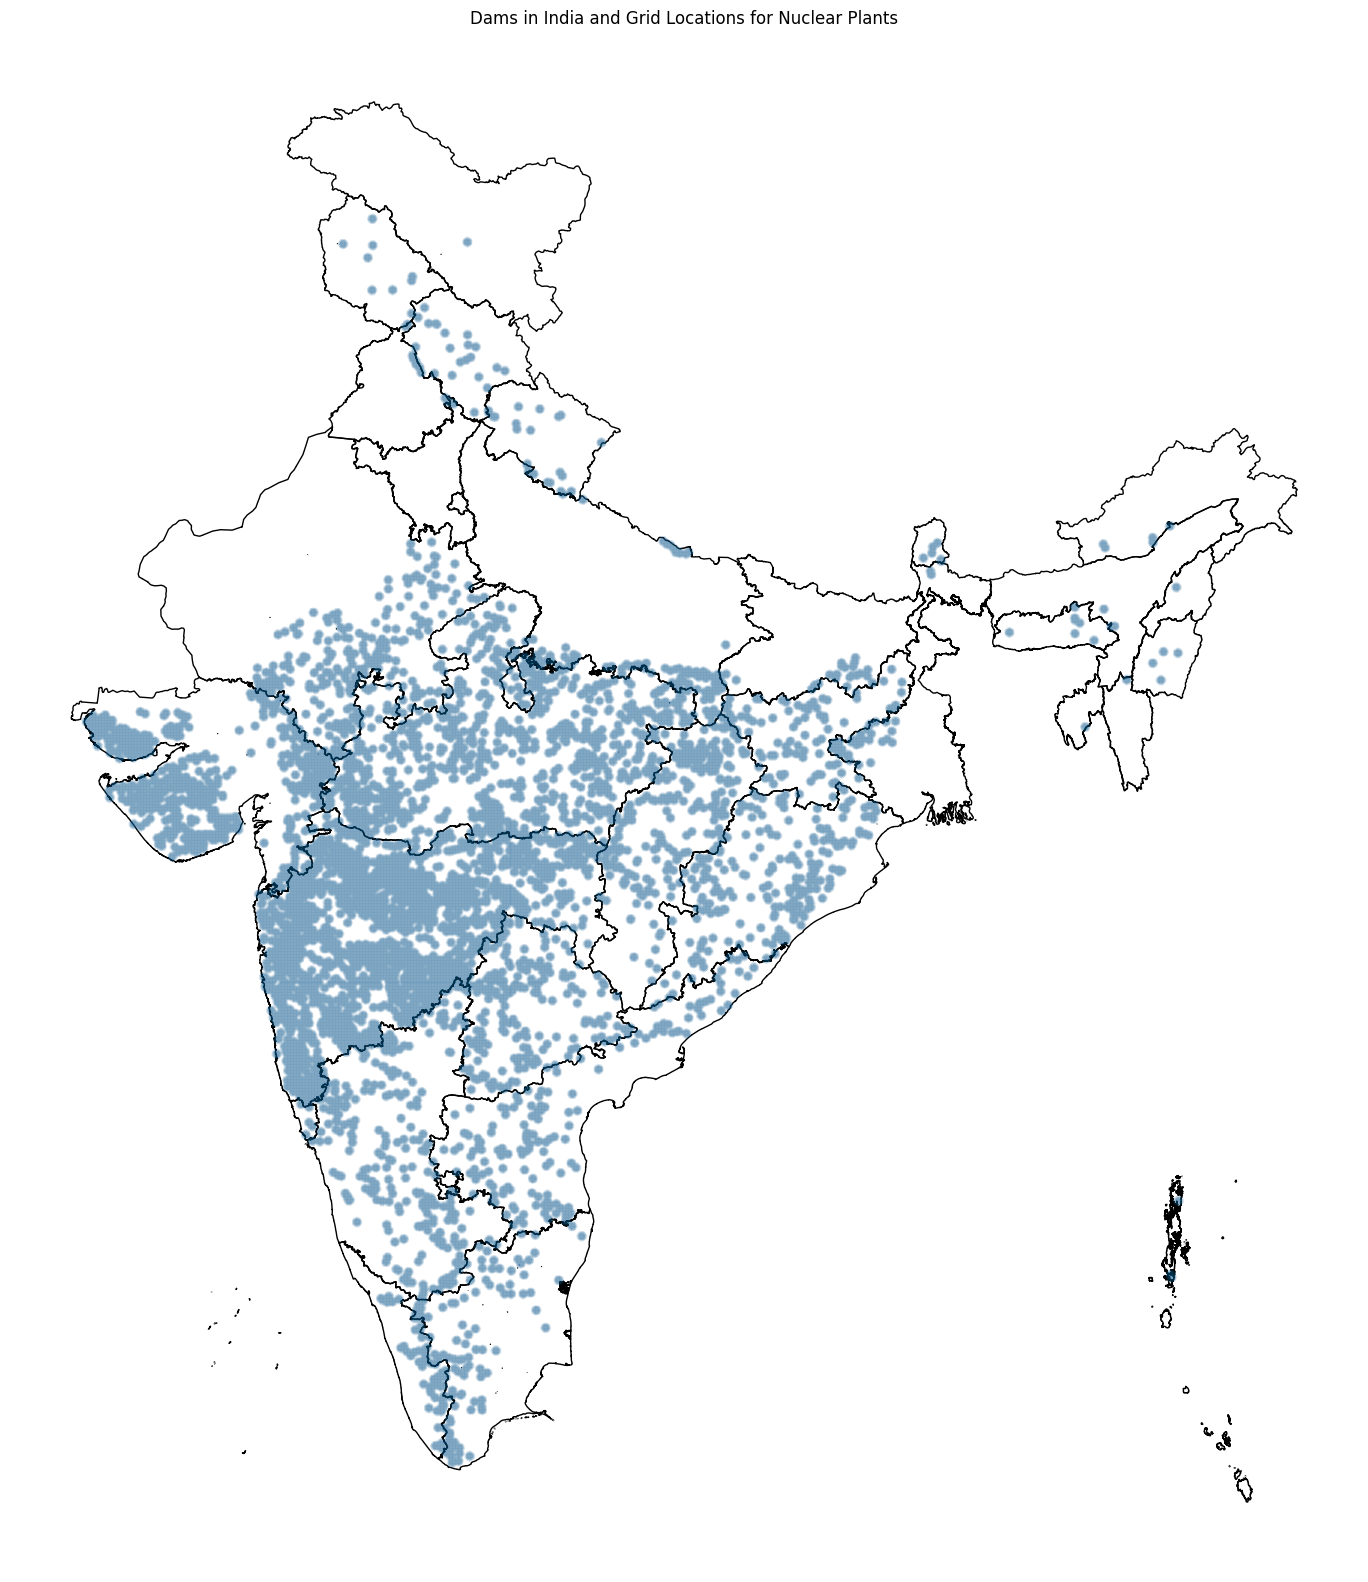

In [22]:
# Plot the results
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
states_india.plot(ax=ax, color='none', edgecolor='black')
#dams.plot(ax=ax, marker='.', markersize=0.5, color="#3251c6")
joined.plot(ax=ax, marker='.', markersize=0.005, alpha=0.5)

plt.title("Dams in India and Grid Locations for Nuclear Plants")
plt.show()

In [10]:
dams.crs

<Projected CRS: PROJCS["WGS_1984_Lambert_Conformal_Conic",GEOGCS[" ...>
Name: WGS_1984_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
states_india = states_india.to_crs(dams.crs)

In [14]:
#Dividing the points state-wise
grid_gdf = gpd.overlay(joined,states_india, how = "intersection")

In [15]:
grid_gdf

,index_right,dam_id,STATE,State_LGD,Shape_Leng,Shape_Area,geometry


In [29]:
#Creating the shapefile(we have it uploaded on github)
output_shapefile_path = r"D:\CS\GitHub\Nuclear-Site-Selection\grid_points_within_states.shp"
grid_gdf.to_file(output_shapefile_path)

C:\Users\Nirman\AppData\Local\Temp\ipykernel_16784\3991369224.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  grid_gdf.to_file(output_shapefile_path)


In [31]:
grid_gdf = gpd.read_file(r"D:\CS\GitHub\Nuclear-Site-Selection\grid_points_within_states.shp")

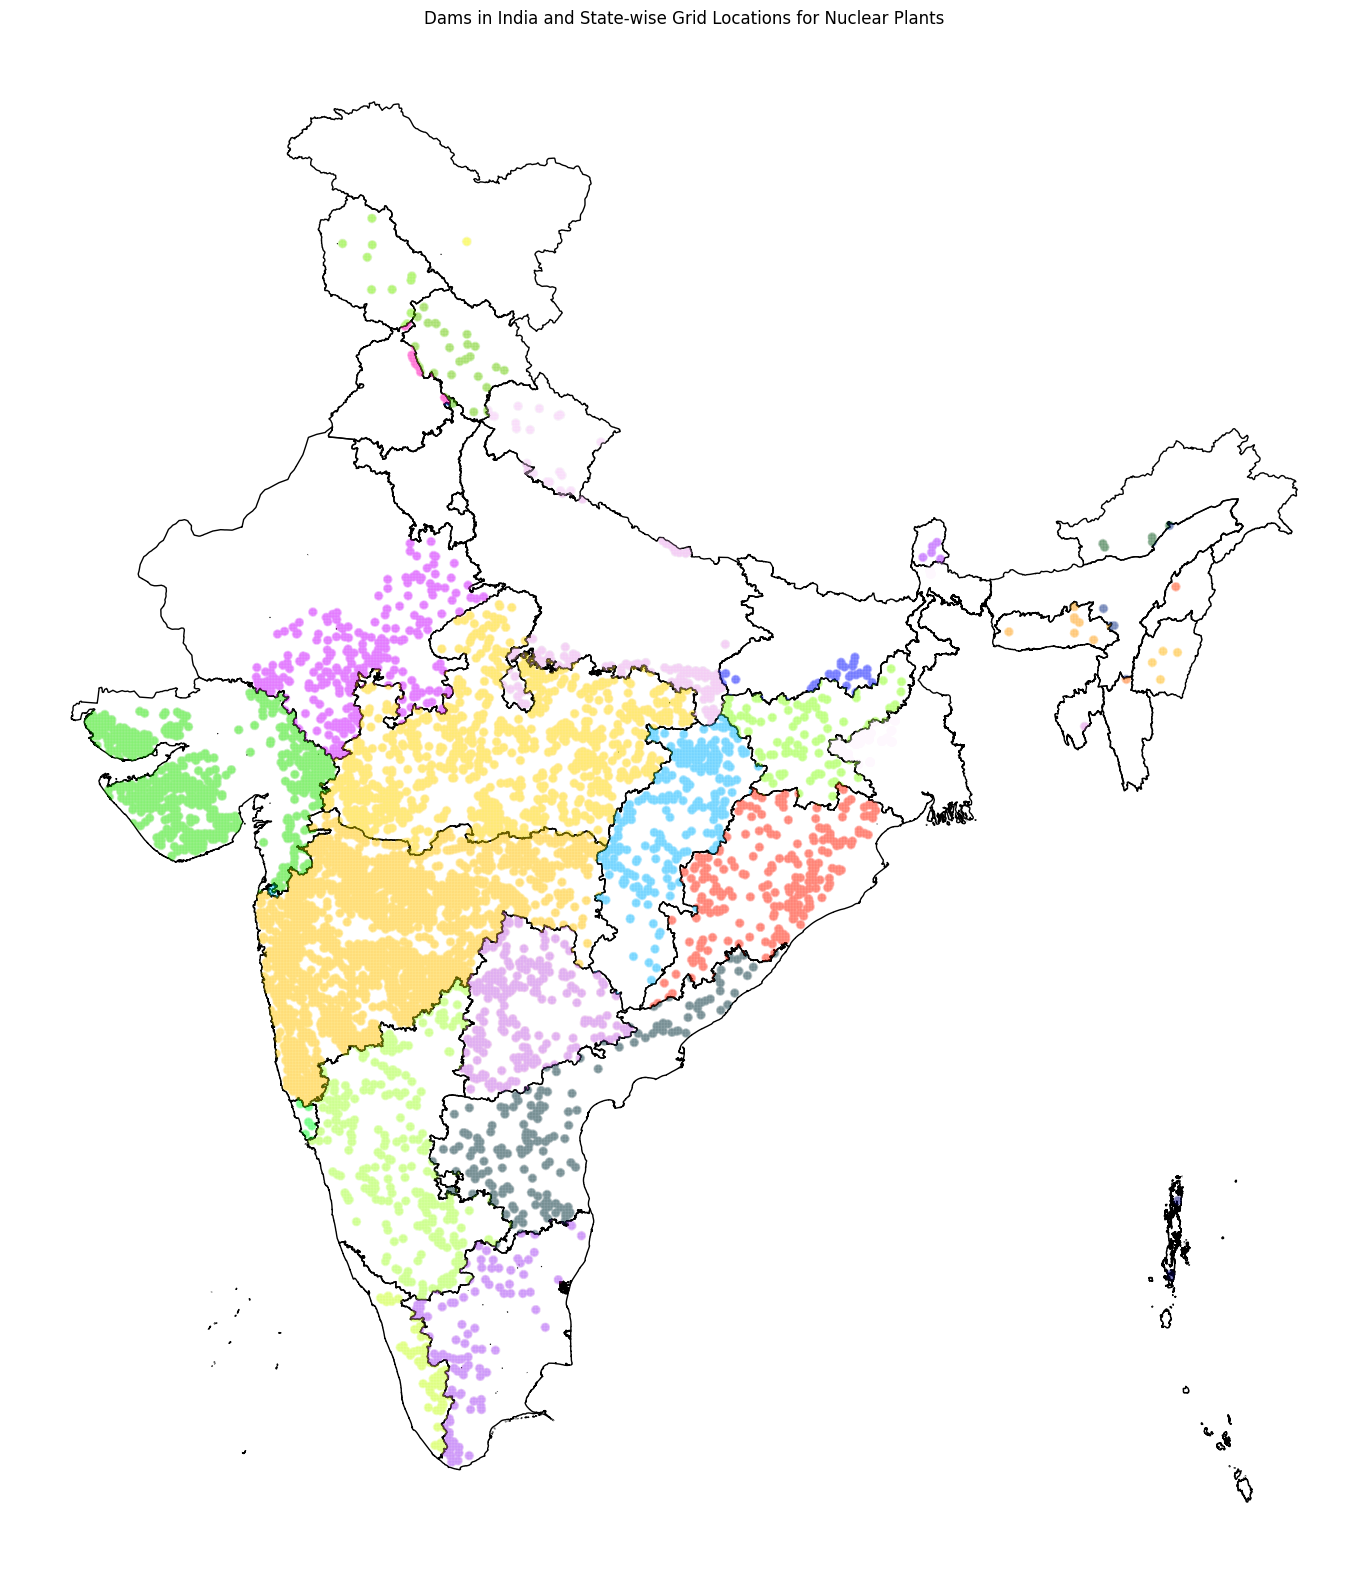

In [30]:
# Plot the results
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
states_india.plot(ax=ax, color='none', edgecolor='black')
#dams.plot(ax=ax, marker='.', markersize=0.5, color="#3251c6")
grid_gdf.plot(ax=ax, marker='.', markersize=0.005, alpha=0.5,cmap = 'gist_ncar', column = "STATE")

plt.title("Dams in India and State-wise Grid Locations for Nuclear Plants")
plt.show()

In [33]:
#Filtering points belonging to Gujarat(works for any particular state)
grid_gdf[grid_gdf['STATE']=='GUJARAT']

,index_righ,dam_id,STATE,State_LGD,Shape_Leng,Shape_Area,geometry
0,3757,Gugariyana Dam,GUJARAT,24,5.255585e+06,1.768007e+11,POINT (2848625.109 3997497.499)
1,3757,Gugariyana Dam,GUJARAT,24,5.255585e+06,1.768007e+11,POINT (2849625.109 3994497.499)
2,3757,Gugariyana Dam,GUJARAT,24,5.255585e+06,1.768007e+11,POINT (2849625.109 3995497.499)
3,3757,Gugariyana Dam,GUJARAT,24,5.255585e+06,1.768007e+11,POINT (2849625.109 3996497.499)
4,3757,Gugariyana Dam,GUJARAT,24,5.255585e+06,1.768007e+11,POINT (2849625.109 3997497.499)
...,...,...,...,...,...,...,...
180771,4782,Zaribuzarg,GUJARAT,24,5.255585e+06,1.768007e+11,POINT (3435625.109 3872497.499)
180772,3802,Kharedi Dam,GUJARAT,24,5.255585e+06,1.768007e+11,POINT (3435625.109 3887497.499)
180773,3802,Kharedi Dam,GUJARAT,24,5.255585e+06,1.768007e+11,POINT (3435625.109 3888497.499)
180774,3802,Kharedi Dam,GUJARAT,24,5.255585e+06,1.768007e+11,POINT (3435625.109 3889497.499)


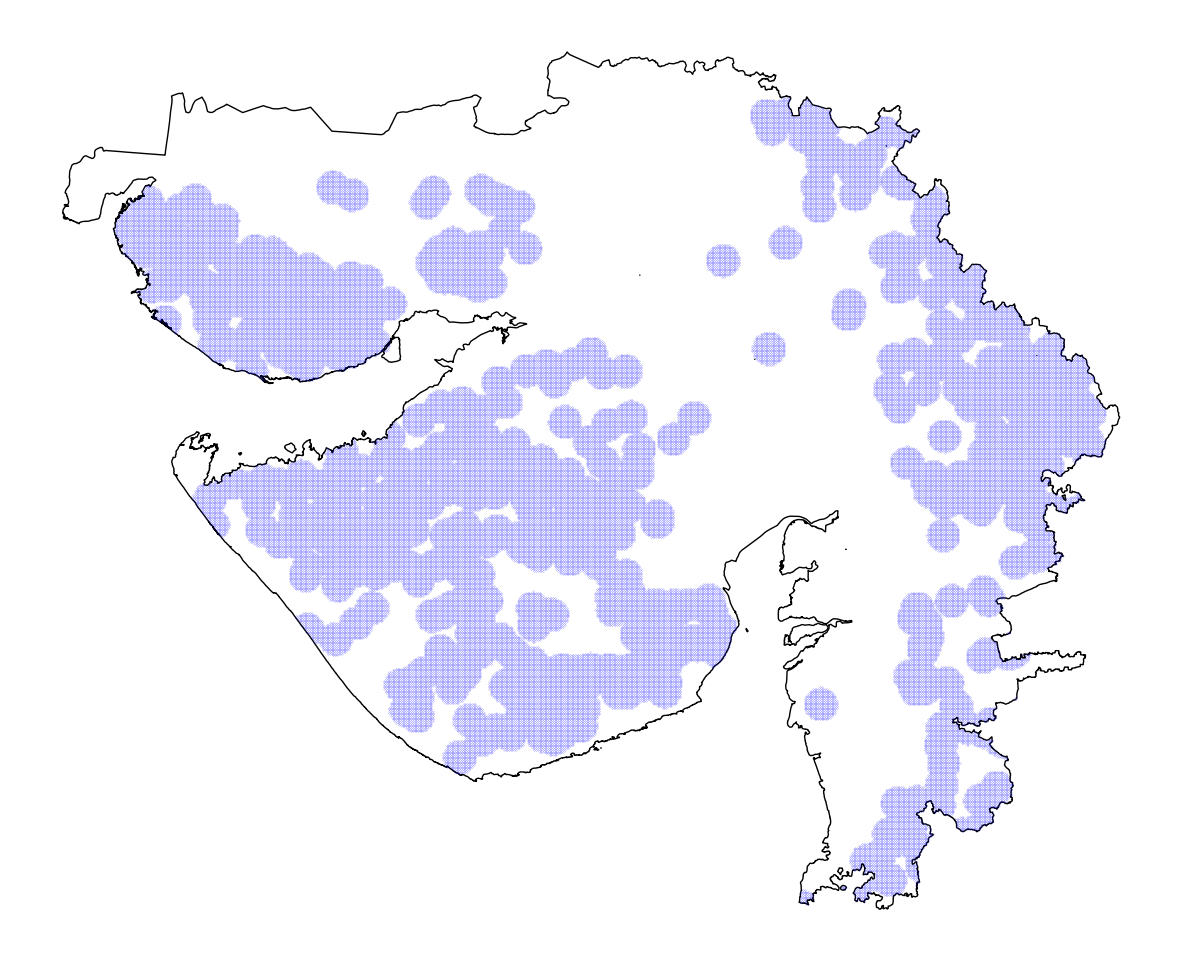

In [35]:
#Plotting grid points in Gujarat
fig, ax2 = plt.subplots(figsize=(15,15))
ax2.axis('off')
grid_gdf_gujarat = grid_gdf[grid_gdf['STATE']=='GUJARAT']
states_india[states_india['STATE']=='GUJARAT'].plot(ax=ax2, color='none', edgecolor='black')
grid_gdf_gujarat.plot(ax=ax2, marker='.', markersize=0.05,color="blue")


plt.show()